# Ames Housing Data EDA

This project aims to predict housing prices in Ames, Iowa based on the Ames Iowa Housing Dataset from the Ames City Assessor's Office, made available by Dean De Cock of Truman University in 2011. Professor De Cock's original paper can be found [here.](http://jse.amstat.org/v19n3/decock.pdf)

Presentation Slides for this project can be found [here.](https://www.beautiful.ai/player/-N4J5UYshyuRtwl5G4I7)

This notebook includes python code for data extraction and cleaning. Preprocessing and feature engineering code as well as Model Fitting and Analysis code can be found in the Feature Engineering and Modeling notebooks, respectively.

### Sections and steps

- <a href="#IMP">1. Reading in Data</a><br>
- <a href="#DQ">2. Data Quality</a><br>
    - <a href="#RD">2.1 Removing Duplicates</a><br>
    - <a href="#MD">2.2 Handling Missing Data</a><br>
    - <a href="#OT">2.3 Handling Outliers</a><br>
    - <a href="#SP">2.4 Summary of Data Cleaning </a>
- <a href="#EDA">3. Exploratory Data Analysis</a><br>
    - <a href="#FP">3.1 First Pass - Visualization</a><br>
    - <a href="#FE">3.2 First Pass - Feature Engineering</a><br>
    - <a href="#SPV">3.3 Second Pass - Visualization </a>
    - <a href="#SEDA">3.4 Summary of EDA Findings </a>
- <a href="#EXP">4. Exporting Cleaned Dataset</a><br>

<p><a name="IMP"></a></p>

## 1. Importing Packages, Reading in Data

In [1]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

#helper module
from helper_module import *

#setting options to view dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#warnings
import warnings
warnings.filterwarnings("ignore")

#helper module functionality
%load_ext autoreload
%autoreload 2

In [2]:
#testing to make sure helper module loaded
test_helpermod()

'Yes! Module loaded successfully!'

In [3]:
#reading in train data
train = pd.read_csv('./data/raw/train.csv')
print(f"Read in Ames Housing Train Data - Shape: {train.shape}")

Read in Ames Housing Train Data - Shape: (1460, 81)


In [4]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


<p><a name="DQ"></a></p>

## 2. Data Quality

In [5]:
print('The raw number of features is ', train.shape[1])
print('The raw number of observations is ', train.shape[0])
print('The data types are:', train.dtypes.unique())

The raw number of features is  81
The raw number of observations is  1460
The data types are: [dtype('int64') dtype('O') dtype('float64')]


In [6]:
#getting a look at column data types
#train.info()

Noticing here categorical values that have numerical dtypes:

        - MSSubClass
        - MoSold
        
As well as ordinal variables that could have numerical dtypes:

        - OverallQual
        - OverallCond

In [7]:
#changing the dtype of these variables to strings
for item in ['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond']:
    train[item] = train[item].astype(str)

In [8]:
#selecting just categorical variables in the dataframe and creating a list
cat_var = train.select_dtypes('O').columns.tolist()

#selecting just continuous variables in the dataframe and creating a list
num_var = train.select_dtypes('number').columns.tolist()
num_var.remove('Id')

print('The number of categorical features is' , len(cat_var))
print('The number of numerical features is', len(num_var))
print('The combined numerical and categorical features are', train.shape[1]-1)

The number of categorical features is 47
The number of numerical features is 33
The combined numerical and categorical features are 80


<p><a name="RD"></a></p>

### 2.1 Removing Duplicates

Reading the original paper that Professor De Cock released with the dataset, he notes that properties sold multiple times in this time frame were only included once (the most recent sale).

There were no duplicates in the original dataset, but since this dataset is a subset, and has been preprocessed, we will still check for duplicates to be thorough.

In [9]:
train[train.Id.duplicated()] #no duplicates found

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<p><a name="MD"></a></p>

### 2.2 Handling Missing Data

We can see that there are several variables missing some observations.

As per the data description, we will replace empty values that have meanings with the appropriate meaning. Eg. For PoolQC, NA actually means there is no pool on the property

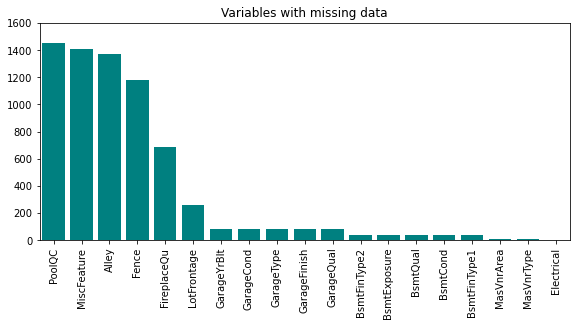

,Number,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [10]:
#using helper function to show us the columns with missing data
help_missing(train, title = 'Variables with missing data')
#plt.savefig('./figures/missing_values.png', bbox_inches='tight')

In [11]:
# Replacing missing values with appropriate meaning based on data description
train.fillna(value={'Alley' : 'NoAlley',
                   'BsmtQual': 'NoBasement',
                   'BsmtCond': 'NoBasement',
                   'BsmtExposure': 'NoBasement',
                   'BsmtFinType1': 'NoBasement',
                   'BsmtFinType2': 'NoBasement',
                   'FireplaceQu' : 'NoFireplace',
                   'GarageType': 'NoGarage',
                   'GarageFinish': 'NoGarage',
                   'GarageQual': 'NoGarage',
                    'GarageCond' : 'NoGarage',
                   'PoolQC': 'NoPool',
                   'Fence': 'NoFence',
                   'MiscFeature': 'NoMisc'},
            inplace = True)

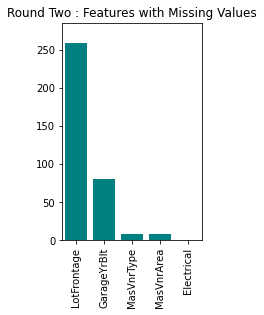

,Number,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493


In [12]:
help_missing(train, 'Round Two : Features with Missing Values')

First looking at MasVnrType and MasVnrArea

In [13]:
#Data description says NA is no MasVnrType
train['MasVnrType'].fillna('None', inplace=True)
#imputing 0 for MasVnrArea
train['MasVnrArea'].fillna(0, inplace=True)

Looking at Electrical

In [14]:
#Looking at Electrical, there is one missing value
#looking at the options
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [15]:
#Looking at Electrical value counts
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [16]:
#going to drop the Electrical observation that is missing data
print(train.shape)
train.drop(np.where(train['Electrical'].isna())[0], axis = 0, inplace = True)
train.shape

(1460, 81)


(1459, 81)

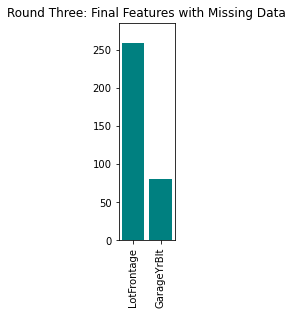

,Number,Percent
LotFrontage,259,17.751885
GarageYrBlt,81,5.551748


In [17]:
help_missing(train, title = 'Round Three: Final Features with Missing Data')

Looking first at Garage Year Built

In [18]:
#Looking at Garage Year Built
print(train['GarageYrBlt'].describe())
print('Earliest Garage built was in : ', train['GarageYrBlt'].min())

count    1378.000000
mean     1978.485486
std        24.686740
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
Earliest Garage built was in :  1900.0


In [19]:
#Looking at Garage Year Built side by side with Year House was Built
train[['GarageYrBlt', 'YearBuilt']].head(20)

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
5,1993.0,1993
6,2004.0,2004
7,1973.0,1973
8,1931.0,1931
9,1939.0,1939


In [20]:
#imputing Garage year as year house was built for missing values
train['GarageYrBlt'].fillna(train.YearBuilt, inplace=True)

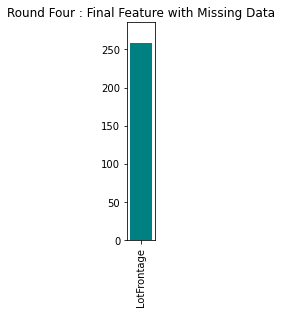

,Number,Percent
LotFrontage,259,17.751885


In [21]:
help_missing(train, title = 'Round Four : Final Feature with Missing Data')

In [22]:
#Looking at LotFrontage
#trying to see if these homes maybe don't have any street
#maybe high density aka condos or apartments?
train[train['LotFrontage'].isnull()]['MSZoning'].value_counts()

RL    229
RM     19
FV      8
RH      3
Name: MSZoning, dtype: int64

In [23]:
#trying again, with type of dwelling
train[train['LotFrontage'].isnull()]['MSSubClass'].value_counts()

20     99
60     69
120    20
80     20
50     16
160     8
30      6
85      6
90      5
70      5
190     3
75      1
40      1
Name: MSSubClass, dtype: int64

In [24]:
#trying again with lot configuration
train[train['LotFrontage'].isnull()]['LotConfig'].value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

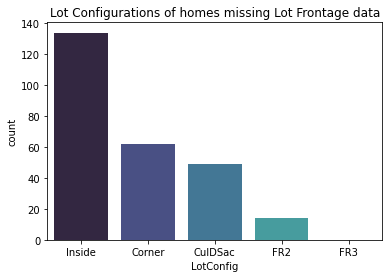

In [25]:
#visualizing with a count plot
sns.countplot(x=train[train['LotFrontage'].isnull()]['LotConfig'],
              data = train[train['LotFrontage'].isnull()],
             order = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
             palette = "mako").set(title='Lot Configurations of homes missing Lot Frontage data');

In [26]:
#comparing this with value counts of lot config across dataset
print(train.LotConfig.value_counts())

Inside     1051
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


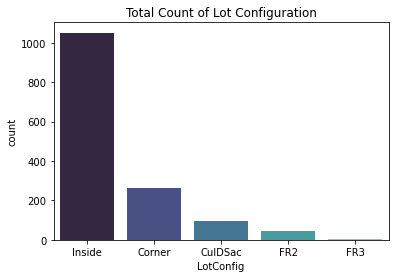

In [27]:
#visualizing with a count plot
sns.countplot(x=train['LotConfig'],
              data = train,
             order = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
             palette = "mako").set(title='Total Count of Lot Configuration');

We could impute the missing values of Lot Frontage as the mean or median of the Lot Configuration. It would make sense that different types of Lot configuration might have more or less lot frontage.

Let's take a look at the distributions of Lot Frontage based on Lot Configuration

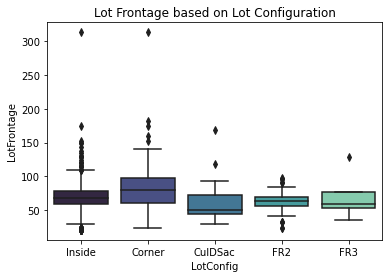

In [28]:
#boxplot of Lot Frontage based on Lot Configuration
sns.boxplot(x='LotConfig',
            y = 'LotFrontage',
            order = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
            data = train,
           palette = "mako").set(title='Lot Frontage based on Lot Configuration');

Immediately noticing some outliers in Lot Frontage, we will deal with those next.

The box plot shows that the amount of Lot Frontage of each property does change based on Lot Configuration. To be sure, let's run an ANOVA.

In [29]:
#Running an ANOVA to make sure the group means are different
model = ols('LotFrontage ~ C(LotConfig)', data = train).fit()
anova_tbl = sm.stats.anova_lm(model, typ=2)
effect_size = anova_tbl['sum_sq'][0]/(anova_tbl['sum_sq'][0]+anova_tbl['sum_sq'][1])
        
p_val = round(anova_tbl['PR(>F)'][0], 5)
print('ANOVA p-val and effect size for classes of Lot Config is :', p_val, ' and ', round(effect_size, 5))

ANOVA p-val and effect size for classes of Lot Config is : 0.0  and  0.07121


In [30]:
#imputing median values for missing Lot Config values

print(train['LotFrontage'].mean())
print(train['LotFrontage'].median())

#Noticing that the mean and the median for the entire Lot Frontage series are very close

70.0475
69.0


In [31]:
#imputing median LotFrontage value based on each LotConfig group
count = 0
for (idx, LotConfig) in train[train['LotFrontage'].isnull()].iterrows():
    config = train['LotConfig'][idx]
    dict1 = train.groupby(['LotConfig']).median()[['LotFrontage']].to_dict()
    train['LotFrontage'][idx] = dict1['LotFrontage'][config]
    count += 1
print(count) #expecting 259

259


In [32]:
#testing to see if it worked
train['LotFrontage'].isnull().sum()

0

<p><a name="OT"></a></p>

### 2.3 Handling Outliers

Creating a dictionary of observations that are outliers for the numerical variables:

In [33]:
ot_dict = {}
for var in num_var:
    z_scores = stats.zscore(train[num_var][[var]])
    outliers = np.where(abs(z_scores)> 4.5)[0].tolist()
    ot_dict[var] = outliers

In [34]:
ot_dict.keys()

dict_keys(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice'])

In Professor De Cock's original paper, he recommends removing outliers from GrLivArea. We will look at these first:

In [35]:
train['GrLivArea'].describe()

count    1459.000000
mean     1515.546950
std       525.650927
min       334.000000
25%      1129.000000
50%      1464.000000
75%      1777.500000
max      5642.000000
Name: GrLivArea, dtype: float64

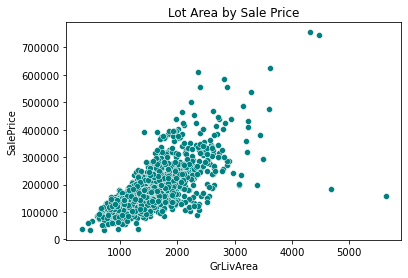

In [36]:
sns.scatterplot(x='GrLivArea', y = 'SalePrice',
                          data=train,
               color = 'teal').set(title='Lot Area by Sale Price');

In [37]:
ot_dict['GrLivArea']

[523, 691, 1182, 1298]

In [38]:
#initializing indicator variable
train['Type'] = 'Normal'

In [39]:
train['Type'][ot_dict['GrLivArea']] = 'Outlier'

In [40]:
#checking
train.Type.value_counts()

Normal     1455
Outlier       4
Name: Type, dtype: int64

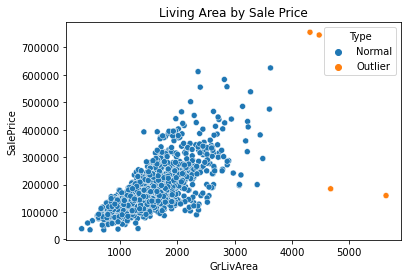

In [41]:
sns.scatterplot(x='GrLivArea',
                y = 'SalePrice',
                hue = 'Type',
                data=train,
                color = 'teal').set(title = "Living Area by Sale Price");
plt.savefig('./figures/LivingAreaOutliers.png', bbox_inches='tight', dpi = 300, transparent = True)

In [43]:
#adding the outliers to list of observations to drop
obs_to_drop = ot_dict['GrLivArea']

Taking a deeper look at LotArea

In [44]:
#Looking at Lot Area Outliers
train['LotArea'].describe()

count      1459.000000
mean      10517.363948
std        9984.666267
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: LotArea, dtype: float64

Creating a scatterplot to see if the outliers from GrLivArea are the same as the outliers for LotArea

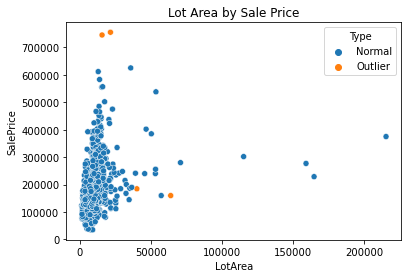

In [45]:
sns.scatterplot(x='LotArea', y = 'SalePrice',
                          data=train,
                hue = 'Type',
               color = 'teal').set(title='Lot Area by Sale Price');

Hm, the outliers for LotArea are different. Let's order the outliers by size of LotArea and examine the four most egeregious ones that have medium sale prices, but extremely large lots.

In [46]:
train.loc[ot_dict['LotArea']].sort_values('LotArea', ascending = False).head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Type
313,314,20,RL,150.0,215245,Pave,NoAlley,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NoMisc,0,6,2009,WD,Normal,375000,Normal
335,336,190,RL,80.0,164660,Grvl,NoAlley,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NoPool,NoFence,Shed,700,8,2008,WD,Normal,228950,Normal
249,250,50,RL,50.0,159000,Pave,NoAlley,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NoPool,NoFence,Shed,500,6,2007,WD,Normal,277000,Normal
706,707,20,RL,50.0,115149,Pave,NoAlley,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NoPool,NoFence,NoMisc,0,6,2007,WD,Normal,302000,Normal


Let's mark these four homes as outliers and remove them from our dataset.

In [48]:
lot_outliers = [313, 335, 249, 706]

In [49]:
train['Type'][lot_outliers] = 'Outlier'

In [50]:
#checking
train.Type.value_counts()

Normal     1451
Outlier       8
Name: Type, dtype: int64

In [51]:
#adding these to our list of observations to drop
obs_to_drop += lot_outliers

Taking a second look at Living Area Outliers

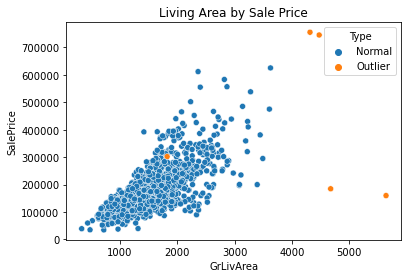

In [53]:
sns.scatterplot(x='GrLivArea',
                y = 'SalePrice',
                hue = 'Type',
                data=train,
                color = 'teal').set(title = "Living Area by Sale Price");
plt.savefig('./figures/Outliers.png', bbox_inches='tight', dpi = 300, transparent = True)

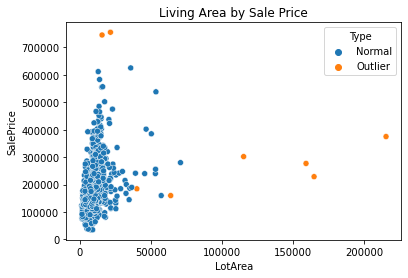

In [54]:
sns.scatterplot(x='LotArea',
                y = 'SalePrice',
                hue = 'Type',
                data=train,
                color = 'teal').set(title = "Living Area by Sale Price");

In [55]:
obs_to_drop

[523, 691, 1182, 1298, 313, 335, 249, 706]

In [56]:
print(train.shape)
print(set(obs_to_drop))
train.drop(obs_to_drop, axis = 0, inplace = True)
print('Dropped ' , len(set(obs_to_drop)), ' observations.')

(1459, 82)
{706, 249, 523, 335, 1298, 691, 313, 1182}
Dropped  8  observations.


In [57]:
train.shape

(1451, 82)

In [58]:
#resetting list of observations to be dropped
obs_to_drop = []

Last look at the distributions of GrLivArea and LotArea with outliers removed

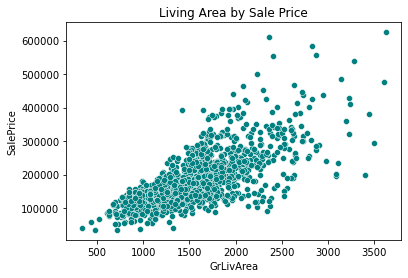

In [59]:
sns.scatterplot(x='GrLivArea',
                y = 'SalePrice',
                data=train,
                color = 'teal').set(title = "Living Area by Sale Price");

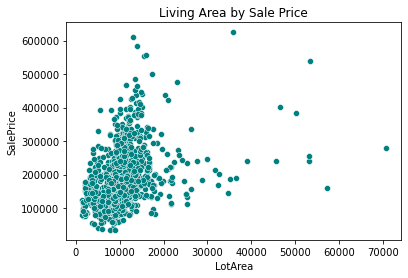

In [60]:
sns.scatterplot(x='LotArea',
                y = 'SalePrice',
                data=train,
                color = 'teal').set(title = "Living Area by Sale Price");

<p><a name="SP"></a></p>

### 2.4 Summary of Data Cleaning

##### Observations Dropped (9)
   - Electrical -> 1 obs dropped due to missing data
   - GrLivArea -> 4 outlier obs dropped
   - LotArea -> 4 outlier obs dropped

<p><a name="EDA"></a></p>

## 3. Exploratory Data Analysis

<p><a name="FP"></a></p>

### 3.1 First Pass - Visualization


#### 3.1.1 Dependant Variable - Sale Price

In [61]:
#descriptive summary of Sale Price
train['SalePrice'].describe()

count      1451.000000
mean     179841.313577
std       76536.990562
min       34900.000000
25%      129900.000000
50%      162900.000000
75%      213495.000000
max      625000.000000
Name: SalePrice, dtype: float64

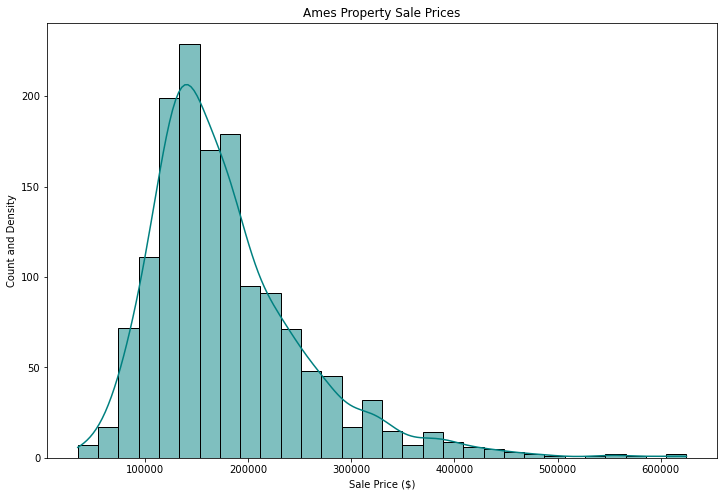

In [67]:
#plotting a histogram using seaborn
#histogram
plt.figure(figsize=(12,8))
sns.histplot(train.SalePrice, bins=30, kde=True, color = 'teal');
plt.title("Ames Property Sale Prices")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count and Density")
plt.savefig('./figures/SalesPrice.png', bbox_inches='tight', dpi = 300, transparent = True)

Noticing that the dependent variable looks right skewed (aka not normally distributed)

In [68]:
#checking Mean and Median
print('Median: %f' % round(train.SalePrice.median()))
print('Mean: %f' % round(train.SalePrice.mean()))
#checking skewness and kurtosis
print("Skewness: %f" % train.SalePrice.skew())
print("Kurtosis: %f" % train.SalePrice.kurt())

Median: 162900.000000
Mean: 179841.000000
Skewness: 1.577625
Kurtosis: 3.957083


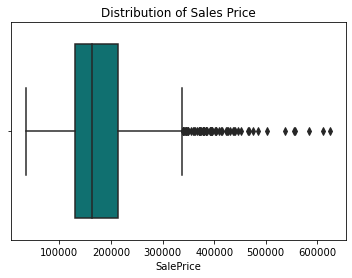

In [69]:
#looking at potential outliers
sns.boxplot(x = train.SalePrice, color = 'teal').set(title = 'Distribution of Sales Price')
plt.show()

In [70]:
#finding sale price outliers
spoutliers = train[np.abs(stats.zscore(train.SalePrice)) > 4]
spoutliers.sort_values('SalePrice')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Type
178,179,20,RL,63.0,17423,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,NoPool,NoFence,NoMisc,0,7,2009,New,Partial,501837,Normal
769,770,60,RL,47.0,53504,Pave,NoAlley,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NoPool,NoFence,NoMisc,0,6,2010,WD,Normal,538000,Normal
440,441,20,RL,105.0,15431,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NoPool,NoFence,NoMisc,0,4,2009,WD,Normal,555000,Normal
1046,1047,60,RL,85.0,16056,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,1992,876,0,2868,0,0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3,716,TA,TA,Y,214,108,0,0,0,0,NoPool,NoFence,NoMisc,0,7,2006,New,Partial,556581,Normal
803,804,60,RL,107.0,13891,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NoPool,NoFence,NoMisc,0,1,2009,New,Partial,582933,Normal
898,899,20,RL,100.0,12919,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NoPool,NoFence,NoMisc,0,3,2010,New,Partial,611657,Normal
1169,1170,60,RL,118.0,35760,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NoPool,NoFence,NoMisc,0,7,2006,WD,Normal,625000,Normal


Noticing that there are only expensive property outliers in this dataset.

To ensure that the residuals of a linear model taken will be normal, we will take the log of the Sale Price instead of the Sale Price.

In [71]:
#adding a column for log sale price
train['log_SalePrice'] = np.log(train['SalePrice'])

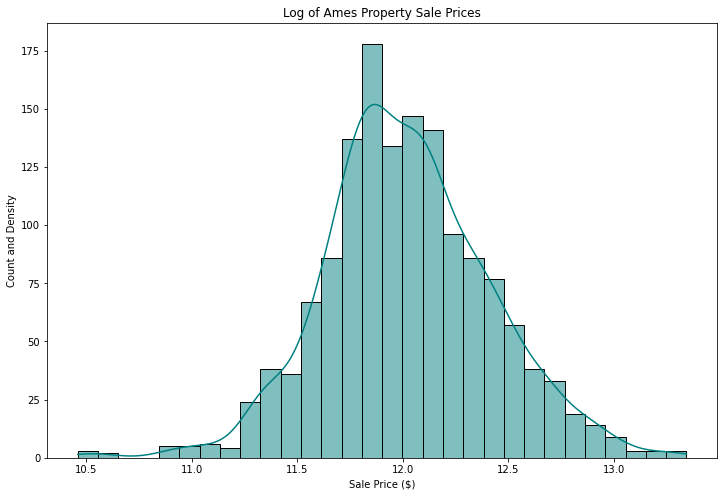

In [72]:
#plotting a histogram using seaborn
#histogram
plt.figure(figsize=(12,8))
sns.histplot(train.log_SalePrice, bins=30, kde=True, color = 'teal')
plt.title("Log of Ames Property Sale Prices")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count and Density")
plt.savefig('./figures/logSalePrice.png', bbox_inches='tight')

In [73]:
#checking Mean and Median
print('Median: %f' % round(train.log_SalePrice.median()))
print('Mean: %f' % round(train.log_SalePrice.mean()))
#checking skewness and kurtosis
print("Skewness: %f" % train.log_SalePrice.skew())
print("Kurtosis: %f" % train.log_SalePrice.kurt())

Median: 12.000000
Mean: 12.000000
Skewness: 0.067487
Kurtosis: 0.681401


Much better!

Let's look at outliers for this new distribution

In [74]:
lg_spoutliers = train[np.abs(stats.zscore(train.log_SalePrice)) > 4]
lg_spoutliers.sort_values('log_SalePrice')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Type,log_SalePrice


Much Better!

In [ ]:
#Dropping the Type Column
train.drop('Type', axis = 1, inplace = True)

In [79]:
train.shape

(1451, 82)

### 3.1.2 Independent Variables
##### Categorical
To get a sense of the independent variables in this dataset, we'll use a helper function to iterate through each categorical variable and look at:
- percentage of missing data
- value counts of observations
- anomalies and outliers
- distribution of variables via barplot and boxplot

Changes to be made will be noted for feature engineering and feature selection.

In [80]:
#selecting just categorical variables in the dataframe and creating a list
cat_var = train.select_dtypes('O').columns.tolist()

print('The number of categorical features is' , len(cat_var))

The number of categorical features is 47


In [81]:
#using helper function
view_cat = look_cat(cat_var, train)

Looking at Foundation
**************************************************
Foundation has 0 missing observations, equal to 0.0%
ANOVA p-val and effect size for categories of Foundation is 0.0  and  0.30982


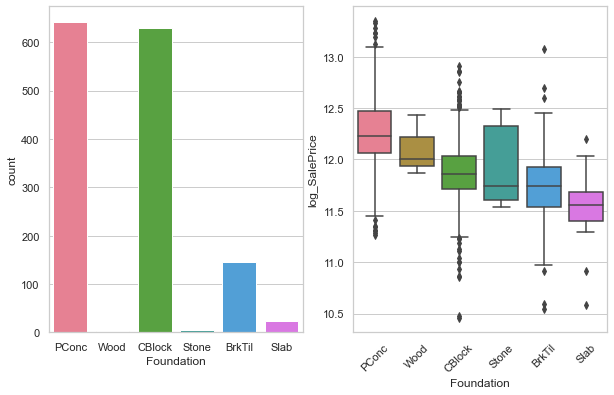

In [105]:
#Rerun this cell to see the first pass look at the next categorical variable

#47 total runs

next(view_cat)

###### First Pass Categorical Variable Findings
1. Variables that are candidates for further ANOVA and potential condensing
    - MSSubClass -> 
    - LandContour -> could be binarized, very small effect size
    - Lot Config -> mostly inside, but culdesac has mean higher log sp
    - Neighborhood -> high effect size, but too many categories
    - BldgType -> mostly one fam
    - Roof Style - > mostly gable
    - RoofMatl -> mostly compshngl
    - Exterior1st
    - Exterior2nd
    - ExterCond
    - Functional -> mostly typical, but some major
    - SaleCondition -> drop Abnormal/Family/Alloca/AdjLand and only keep normal and partial (new) sales?
3. Variables that are candidates to be dropped
    - Street -> all but 6 observations are in the same category
    - Alley -> only 91 homes with Alley
    - Utilities -> all but one have all public utilities, pval is insig
    - LandSlope -> insig ANOVA
    - BsmtFinType2 -> insig ANOVA
    - PoolQC -> maybe convert to has pool or not (missing 99.52%)
    - Fence -> maybe convert to has fence and not (missing 80%)
    - MiscFeature -> most missing, high p val (missing 96%)
4. Variables to be adjusted
    - MSZoning -> remove 10 obs that are commercial
    - Condition 1 -> maybe split into normal, pos and negative condition
    - Same for Condition 2 -> possible to drop, all but 15 obs are normal
    - House Style -> maybe create 2nd floor or not variable
    - Heating -> maybe split into GasA and other
    - Electrical -> maybe split into Sbrkr and other
    - Paved -> Paved and Not Paved
5. Variables to keep (high effect sizes)
    - MasVnrType
    - ExterQual
    - Foundation
    - BsmtQual
    - BsmtExposure
    - BsmtFinType1
    - HeatingQC
    - CentralAir
    - Kitchen Qual
    - FireplaceQu
    - GarageType
    - GarageFinish
    - SaleType
6. Other Notes
    - LotShape -> interestingly the moderately irregular obs have slightly higher mean sale price
    - MoSold -> highest frequencies in summer months, but not much price diff by month


##### Numerical
To get a sense of the idependent variables in this dataset, we'll use a helper function to iterate through each categorical variable and look at:
- missing data
- anomalies and outliers
- pearson's correlation with dependent variable
- distribution via histogram and scatterplot

Then we'll look at multicollinearity between the numerical variables

Changes to be made will be noted for feature engineering and feature selection.

In [116]:
#selecting just continuous variables in the dataframe and creating a list
num_var = train.select_dtypes('number').columns.tolist()
num_var.remove('Id')
num_var.remove('log_SalePrice')

print('The number of numerical features is' , len(num_var))

The number of numerical features is 33


In [117]:
#making sure all variable dtypes are int, for helper function to work
for num in num_var:
    train[num] = train[num].astype(int)

In [118]:
view_num = look_num(num_var, train)

Looking at SalePrice
**************************************************
count      1451.000000
mean     179841.313577
std       76536.990562
min       34900.000000
25%      129900.000000
50%      162900.000000
75%      213495.000000
max      625000.000000
Name: SalePrice, dtype: float64
**************************************************
Pearsons correlation (r): 0.954
**************************************************


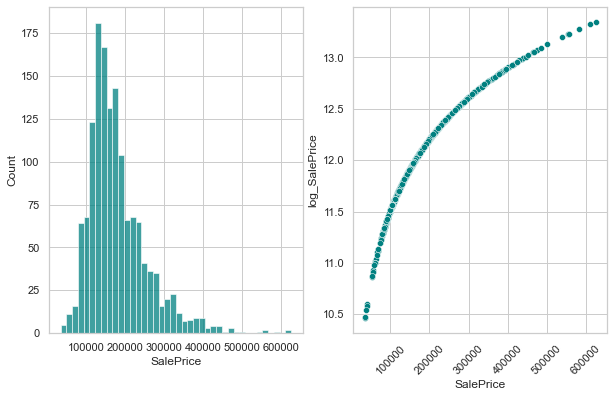

In [151]:
#Rerun this cell to see the first pass of the next numerical variable
#33 runs
next(view_num)

###### First Pass Numerical Variable Findings
1. Variables that are candidates to be dropped
    - BsmtFinSF2 (r of -0.003)
    - LowQualFinSF
    - 3SsnPorch (r = 0.06)
    - PoolArea(r = 0.043)
    - MiscVal (r = -0.02)
2. Variables to be adjusted
    - LotFrontage has two potential outliers (lot frontage > 300)
    - Lot Area has some outliers too (lot area > 40000)
    - OverallQual, Overall Cond, YrSold, should be ordinal variables
    - MasVnrArea has a potential outlier
3. Variables to keep (high effect sizes)
    - LotFrontage, LotArea , OverallQual, Year Built, Year RemodAdd, MasVnrArea, BsmtFinSF1, BsmtUnfSF, Total BsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF
6. Other Notes

#### Looking into Multicollinearity among Features

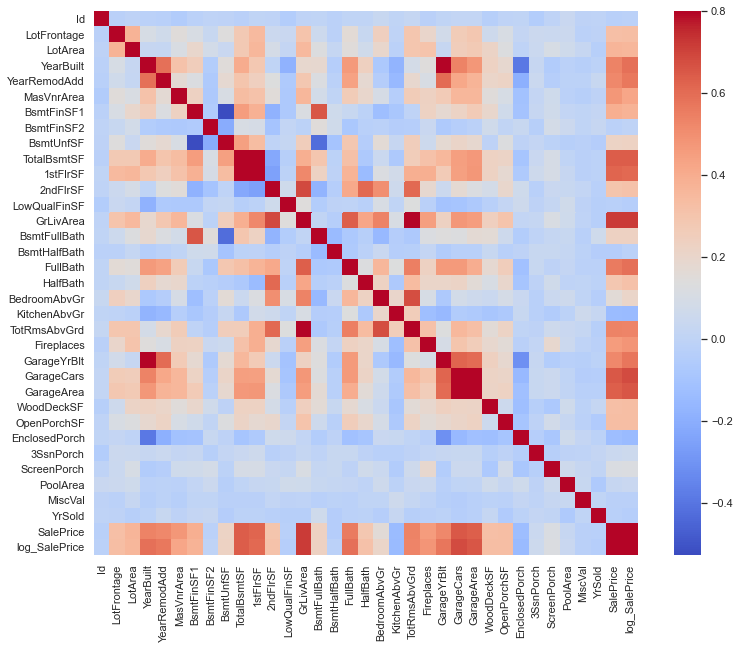

In [153]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corrmat, vmax=.8, cmap = 'coolwarm', square=True)
plt.savefig('./figures/raw_multicollinear.png', bbox_inches='tight', dpi = 300, transparent = True)

Multicollinear Feature Pairs observed in Independent variables:
1. TotalBsmtSF <> 1stFlrSF
2. GarageCars <> GarageArea
3. YearBuilt <> GarageYrBlt
4. GrLivArea <> TotRmsAbvGrd

All these pairs make intuitive sense. We will need to drop or change one feature in each pair before using linear models.

Features with strong correlation with log_SalePrice:
1. OverallQual
2. GrLivArea
3. YearBuilt
4. YearRemodAdd
5. TotalBsmtSF
6. 1stFlrSF
7. GarageCars
8. GarageArea
9. FullBath

Taking a closer look

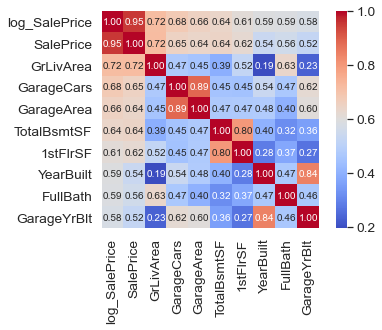

In [154]:
#log_saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'log_SalePrice')['log_SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = 'coolwarm', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('./figures/salepricecorrmatrix.png', bbox_inches='tight', dpi = 300, transparent = True)
plt.show()

GarageCars is slightly more correlated to log_SalePrice, so we will drop GarageArea.

We will also drop GarageYrBlt and keep YearBuilt.

We will wait to decided which of TotalBsmtSF and 1stFlrSF to drop during feature engineering.

<p><a name="FE"></a></p>

### 3.3 First Pass - Feature Engineering

Based on first pass looking at all the variables, I'd like to dig more into  BsmtTotalSF and 1stFlrSF and try to address the multicollinearity. It's possible that 'first floor' means basement for some listings. I'd also like to derive some new features, create binary variables for some features and drop the features that were previously flagged.

 ##### Features to create
 ###### 1. Numeric
 - AgeHome -> Age of Home
 - YrsSnRmdl -> Years since remodeling
 - TotBthrm -> Total number of bathrooms (including basement)
 - TotFloors -> Total number of floors

###### 2. Categorical
 - NeighbQuality -> Group Neighborhoods based on OverallQual and OverallCond
 
###### 3. Binary
 - HasFireplace
 - Has Alley
 - HasFence -> has Fence or Not
 - HasPool -> has Pool or Not
 - HasGarage -> has Garage or Not
 - NearNeg -> near arterial road, railroad, or other negative local feature
 - NearPos -> near park, green belt or other positive local feature
 - Heating -> GasA and other
 - Electrical -> Sbrkr and other
 - Paved -> Paved and other
 
##### Features to drop
- Apart from features used for feature engineering
 - Utilities - all obs use public utilities except for one
 - GarageArea - multicollinear with GarageCars
 - GarageYrBlt - multicollinear with YearBuilt
 - Street - not much variability, only 6 obs outside of one category
 - PoolQC - not much variability (missing 99.52% of obs)
 - MiscFeature and MiscVal - insignificant p val for ANOVA, missing 96% of obs

In [155]:
#initializing list of features to drop
col_to_drop = ['Utilities', 'GarageArea', 'GarageYrBlt', 'Street', 'PoolQC', 'MiscFeature', 'MiscVal']

In [156]:
#making sure Year Sold and Year Built features are integers
train['YrSold'] = train['YrSold'].astype(int)
train['YearBuilt'] = train['YearBuilt'].astype(int)
train['YearRemodAdd'] = train['YearRemodAdd'].astype(int)

In [157]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [158]:
#Deriving new numerical features
train['AgeHome'] = train['YrSold'] - train['YearBuilt']
train['YrsSnRmdl'] = train['YrSold'] - train['YearRemodAdd']
train['TotBthrm'] = train['FullBath'] + (train['HalfBath']*.5) + train['BsmtFullBath'] + (train['BsmtHalfBath'] * .5)

In [159]:
#Deriving TotFloors
train['TotFloors'] = np.nan
train['MSSubClass'] = train['MSSubClass'].astype(int)
for (idx, MSSubClass) in train.iterrows():
    dwelling = train['MSSubClass'][idx]
    if dwelling in [20, 30, 40, 120]:
        temp = 1
    elif dwelling in [45, 50, 85, 150]:
        temp = 1.5
    elif dwelling in [60, 70, 80, 90, 160, 180, 190]:
        temp = 2
    elif dwelling in [75]:
        temp = 2.5
    else:
        raise KeyError(f"Invalid dwelling type detected: {dwelling}")
    train['TotFloors'] = temp
train['MSSubClass'] = train['MSSubClass'].astype(str)

In [160]:
#making sure to drop variables used in feature engineering to prevent multicollinearity
col_to_drop += ['YrSold', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'MSSubClass']

In [161]:
train.shape

(1451, 86)

In [162]:
#making sure OverallQual, OverallCond
train['OverallQual'] = train['OverallQual'].astype(int)
train['OverallCond'] = train['OverallCond'].astype(int)

In [163]:
#Creating a Neighborhood Quality Score
temp_ = train[['Neighborhood', 'OverallQual', 'OverallCond']].copy().groupby(['Neighborhood']).mean()

In [164]:
temp_

,OverallQual,OverallCond
Neighborhood,,
Blmngtn,7.176471,5.000000
Blueste,6.000000,6.000000
BrDale,5.687500,5.437500
BrkSide,5.051724,6.137931
ClearCr,5.846154,5.653846
CollgCr,6.640000,5.240000
Crawfor,6.274510,6.588235
Edwards,4.979592,5.448980
Gilbert,6.556962,5.126582


In [165]:
#adding OverallQual average, and OverallCond average for each neighborhood
temp_['NeighbQual'] = temp_['OverallQual'] + temp_['OverallCond']
temp_.drop(['OverallQual', 'OverallCond'], axis = 1, inplace = True)

In [166]:
temp_.sort_values(by = ['NeighbQual'], ascending = False, inplace = True)

In [167]:
print(temp_['NeighbQual'].median())
print(temp_['NeighbQual'].mean())

11.683544303797468
11.748654323230003


In [168]:
temp_ = temp_.reset_index()

In [169]:
#Creating lists of which neighborhoods are in each group
Ex = temp_.iloc[0:5]['Neighborhood'].tolist()
Gd = temp_.iloc[5:10]['Neighborhood'].tolist()
TA = temp_.iloc[10:15]['Neighborhood'].tolist()
Fa = temp_.iloc[15:20]['Neighborhood'].tolist()
Po = temp_.iloc[20:25]['Neighborhood'].tolist()

In [170]:
#doublechecking to make sure all neighborhoods got covered - expecting 25
len(Ex + Gd + TA + Fa + Po)

25

In [171]:
#assigning a neighborhood quality group to each observation
train['NeighbQual'] = np.nan
#resetting index so assignment can occur
train = train.reset_index()
for n in Ex:
    ind = np.where(train['Neighborhood'] == n)[0].tolist()
    train.loc[ind,'NeighbQual'] = 'Ex'
    
for n in Gd:
    ind = np.where(train['Neighborhood'] == n)[0].tolist()
    train.loc[ind,'NeighbQual'] = 'Gd'
    
for n in TA:
    ind = np.where(train['Neighborhood'] == n)[0].tolist()
    train.loc[ind,'NeighbQual'] = 'TA'
    
for n in Fa:
    ind = np.where(train['Neighborhood'] == n)[0].tolist()
    train.loc[ind,'NeighbQual'] = 'Fa'
    
for n in Po:
    ind = np.where(train['Neighborhood'] == n)[0].tolist()
    train.loc[ind,'NeighbQual'] = 'Po'

In [172]:
train.head()
train[['Neighborhood', 'NeighbQual']].head(3)

,Neighborhood,NeighbQual
0,CollgCr,TA
1,Veenker,Ex
2,CollgCr,TA


In [173]:
col_to_drop += ['Neighborhood']

##### Deriving Binary Variables

In [174]:
#HasFireplace
print(train['Fireplaces'].value_counts())
#initializing column to be filled with 1
train['HasFireplace'] = 1
train.loc[ train.Fireplaces == '0', 'HasFireplace'] = 0

0    689
1    649
2    109
3      4
Name: Fireplaces, dtype: int64


In [175]:
#HasAlley
print(train['Alley'].value_counts())
#initializing column to be filled with 1
train['HasAlley'] = 1
train.loc[ train.Alley == 'NoAlley', 'HasAlley'] = 0
#testing
#train[['Alley', 'HasAlley']].head(20)

NoAlley    1360
Grvl         50
Pave         41
Name: Alley, dtype: int64


In [176]:
#HasFence
print(train['Fence'].value_counts())
#initializing column to be filled with 1
train['HasFence'] = 1
train.loc[ train.Fence == 'NoFence', 'HasFence'] = 0
#testing
#train[['Fence', 'HasFence']].head(5)

NoFence    1171
MnPrv       156
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64


In [177]:
#HasPool
print(train['PoolArea'].value_counts())
#initializing column to be filled with 0
train['HasPool'] = 0
train.loc[ train.PoolArea > 1, 'HasPool'] = 1
#testing
#train[['PoolArea', 'HasPool']].head(5)

0      1446
512       1
519       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64


In [178]:
#HasGarage
print(train['GarageFinish'].value_counts())
#initializing column to be filled with 1
train['HasGarage'] = 1
train.loc[ train.GarageFinish == 'NoGarage', 'HasGarage'] = 0
#testing
#train[['GarageFinish', 'HasGarage']].head(5)

Unf         604
RFn         421
Fin         345
NoGarage     81
Name: GarageFinish, dtype: int64


In [179]:
#Heating
print(train['Heating'].value_counts())
train.loc[ train.Heating == 'GasW', 'Heating'] = 'other'
train.loc[ train.Heating == 'Grav', 'Heating'] = 'other'
train.loc[ train.Heating == 'Wall', 'Heating'] = 'other'
train.loc[ train.Heating == 'OthW', 'Heating'] = 'other'
train.loc[ train.Heating == 'Floor', 'Heating'] = 'other'
#testing
#train[['GarageFinish', 'HasGarage']].head(5)

GasA     1420
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


In [180]:
#Electrical
print(train['Electrical'].value_counts())
train.loc[ train.Electrical == 'FuseA', 'Electrical'] = 'other'
train.loc[ train.Electrical == 'FuseF', 'Electrical'] = 'other'
train.loc[ train.Electrical == 'FuseP', 'Electrical'] = 'other'
train.loc[ train.Electrical == 'Mix', 'Electrical'] = 'other'
#testing
#train[['GarageFinish', 'HasGarage']].head(5)

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [181]:
#Paved
print(train['PavedDrive'].value_counts())
train.loc[ train.PavedDrive == 'N', 'PavedDrive'] = 'other'
train.loc[ train.PavedDrive == 'P', 'PavedDrive'] = 'other'

Y    1331
N      90
P      30
Name: PavedDrive, dtype: int64


In [182]:
#NearNeg and NearPos
print(train['Condition1'].value_counts())
print(train['Condition2'].value_counts())
#initializing column to be filled with 0
train['NearNeg'] = 0
train['NearPos'] = 0
train.loc[ train.Condition1 == 'Artery', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'Artery', 'NearNeg'] = 1
train.loc[ train.Condition1 == 'Feedr', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'Feedr', 'NearNeg'] = 1
train.loc[ train.Condition1 == 'RRNn', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'RRNn', 'NearNeg'] = 1
train.loc[ train.Condition1 == 'RRAn', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'RRAn', 'NearNeg'] = 1
train.loc[ train.Condition1 == 'RRNe', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'RRNe', 'NearNeg'] = 1
train.loc[ train.Condition1 == 'RRAe', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'RRAe', 'NearNeg'] = 1

train.loc[ train.Condition1 == 'PosN', 'NearPos'] = 1
train.loc[ train.Condition2 == 'PosN', 'NearPos'] = 1
train.loc[ train.Condition1 == 'PosA', 'NearPos'] = 1
train.loc[ train.Condition2 == 'PosA', 'NearPos'] = 1

Norm      1253
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1437
Feedr        6
RRNn         2
Artery       2
PosA         1
PosN         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64


In [183]:
train['NearNeg'].value_counts()

0    1279
1     172
Name: NearNeg, dtype: int64

In [184]:
train['NearPos'].value_counts()

0    1424
1      27
Name: NearPos, dtype: int64

In [185]:
train.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice,AgeHome,YrsSnRmdl,TotBthrm,TotFloors,NeighbQual,HasFireplace,HasAlley,HasFence,HasPool,HasGarage,NearNeg,NearPos
0,0,1,60,RL,65,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFireplace,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,NoMisc,0,2,2008,WD,Normal,208500,12.247694,5,5,3.5,1,TA,1,0,0,0,1,0,0
1,1,2,20,RL,80,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2007,WD,Normal,181500,12.109011,31,31,2.5,1,Ex,1,0,0,0,1,1,0
2,2,3,60,RL,68,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,NoMisc,0,9,2008,WD,Normal,223500,12.317167,7,6,3.5,1,TA,1,0,0,0,1,0,0
3,3,4,70,RL,60,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,NoMisc,0,2,2006,WD,Abnorml,140000,11.849398,91,36,2.0,1,Ex,1,0,0,0,1,0,0
4,4,5,60,RL,84,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,NoMisc,0,12,2008,WD,Normal,250000,12.429216,8,8,3.5,1,Ex,1,0,0,0,1,0,0


In [186]:
col_to_drop += ['Fireplaces', 'Alley', 'Fence', 'PoolArea', 'Condition1', 'Condition2', 'index', 'Id', 'HouseStyle']

In [187]:
#Dropping features
train.drop(col_to_drop, axis = 1, inplace = True)

In [188]:
train.shape

(1451, 70)

In [189]:
#resetting
col_to_drop = []
obs_to_drop = []

<p><a name="SPV"></a></p>

### 3.4 Second Pass - Visualization and Statistics

### Pearson's correlation for numerical variables

Now that we have addressed all missing data, and removed outliers, we can re-run some bivariate statistical tests to help us glean which features to select.

In [ ]:
#selecting numerical variables
num_var = train.select_dtypes('number').columns.tolist()
#num_var.remove('index')
#num_var.remove('Id')
num_var.remove('SalePrice')

In [ ]:
num_var

In [ ]:
#pearson's correlation
lose = []
def my_pear(numvar_list):
    keep = []
    for item in numvar_list:
        corr = pearsonr(train[item], train['log_SalePrice'])
        print('Pearsons correlation for ' + item + ' (r):', round(corr[0],3))
        if abs(round(corr[0],3)) > .15:
            keep.append(item)
    return keep

In [ ]:
print('Starting with ' + str(len(num_var)) + ' numerical variables.')
num_var = my_pear(num_var)
print('Reducing to ' + str(len(num_var)) + ' numerical variables.')

### ANOVA and condensing for categorical variables

In [ ]:
#selecting categorical variables
cat_var = train.select_dtypes('O').columns.tolist()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def my_anova(catvar_list):
    C_list = []
    keep = []
    for item in catvar_list:
        temp_ = 'log_SalePrice ~ C(' + item + ')'
        model = ols(temp_, data = train).fit()
        anova_tbl = sm.stats.anova_lm(model, typ=2)
        effect_size = anova_tbl['sum_sq'][0]/(anova_tbl['sum_sq'][0]+anova_tbl['sum_sq'][1])
        
        p_val = round(anova_tbl['PR(>F)'][0], 5)
        print('ANOVA p-val for classes of ' + item + ' is', p_val, ' and ', round(effect_size, 5))
        if p_val <= 0.01:
            keep.append(item)
    return keep 

In [ ]:
print('Starting with ' + str(len(cat_var)) + ' categorical variables.')
cat_var = my_anova(cat_var)
print('Reducing to ' + str(len(cat_var)) + ' categorical variables.')

In [ ]:
num_var.append('SalePrice')
new_var_list = num_var + cat_var
len(new_var_list)

In [ ]:
train = train[new_var_list]
train.head()

Based on our first pass, and familiarization with the data, the independent variables in this dataset fall broadly into these 'buckets':
- Land and Exterior - neighborhood, lot and land characteristics
- House Quality, Construction and Utilities- year built, types of materials used and quality
- Indoor Areas
- Basement
- Semi-Indoor Areas - Garage, Porches, Pool, Fence
- Sale Information - month, year, type of sale etc

We will look at the categorical variables in each of these buckets individually and adjust features.

In [ ]:
#initializing an iterator to help bucket variables
call_var = iter(new_var_list)

In [ ]:
next(call_var)

In [ ]:
#Bucketing variables into lists
Location = ['LotFrontage', 'LotArea', 'NearNeg', 'MSZoning','LotShape', 'LandContour', 'LotConfig', 'NeighbQual']
HouseQual = ['OverallQual', 'MasVnrArea', 'AgeHome', 'YrsSnRmdl', 'HasFireplace', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation']
Basement = ['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu']
IndoorA = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'TotBthrm', ]
GaragePlus = ['WoodDeckSF', 'OpenPorchSF','HasFence', 'HasGarage', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive']
SaleInfo = ['SaleType', 'SaleCondition']

In [ ]:
#Sanity Check to make sure I got all the variables
bucketlist = [Location, HouseQual, Basement, IndoorA, GaragePlus, SaleInfo]
temp_ = 0
for L in bucketlist:
    temp_ += len(L)
print(temp_)
print(len(new_var_list)) #expect this to be one longer, for dependent variable

In [ ]:
#Removing MSZoning = C observations #9 obs
obs_to_drop = np.where(train['MSZoning'] == 'C (all)')[0].tolist()

In [ ]:
obs_to_drop

In [ ]:
train.drop(obs_to_drop, axis = 0, inplace = True)

<p><a name="SEDA"></a></p>

### 3.3 Summary of EDA Findings 




<p><a name="EXP"></a></p>

## 4. Exporting Cleaned Datasets

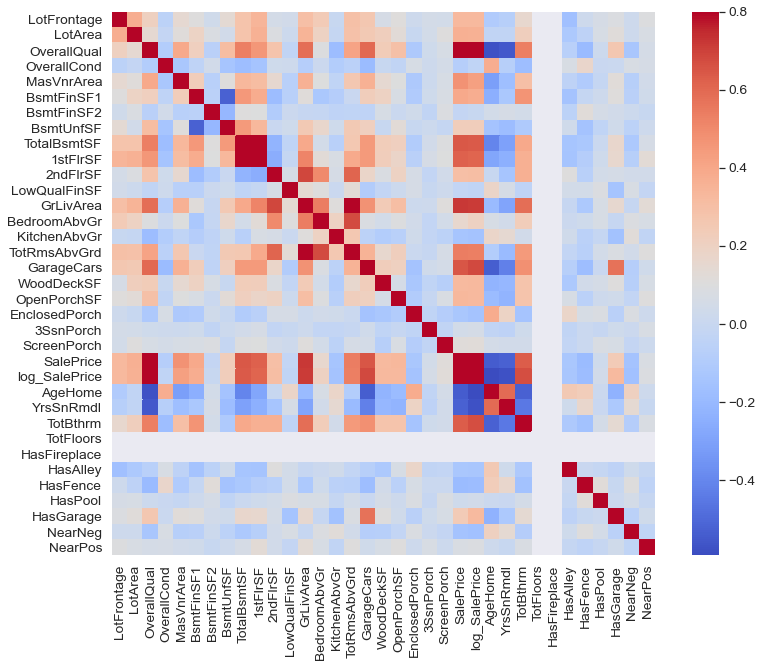

In [190]:
#gentle recheck of multicollinearity
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corrmat, vmax=.8, cmap = 'coolwarm', square=True);

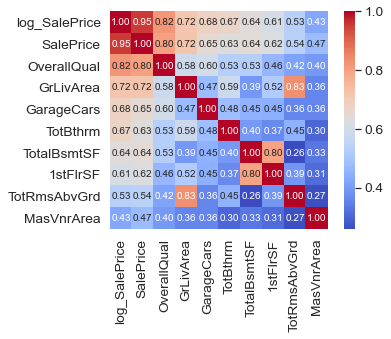

In [191]:
#log_saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'log_SalePrice')['log_SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = 'coolwarm', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [193]:
col_to_drop = ['TotRmsAbvGrd', '1stFlrSF']

In [194]:
train.drop(col_to_drop, axis = 1, inplace = True)

In [199]:
train.shape

(1451, 68)

In [200]:
train.to_csv('./data/cleaned/train_c.csv')